<a href="https://colab.research.google.com/github/oktavian-ramadhani/data-analyst/blob/FUNDAMENTAL-DATA-ANALYST/K_MEANS_CLUSTERING_ANALISIS_FUNDAMENTAL_DATA_KOLESTEROL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS CLUSTERING - ANALISIS FUNDAMENTAL DATA KOLESTEROL
  
Dataset: Cardiovascular Disease Dataset dari Kaggle

> Nama: Oktavian Ramadhani

> NIM : 19240388

> Mata Kuliah: FUNDAMENTAL DATA ANALYST (0406)



Dataset Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# LOAD DATASET

In [ ]:
df = pd.read_csv('/content/sample_data/cardio_train.csv', delimiter=';')

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 49,961
Jumlah kolom: 13


In [ ]:
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1     0.0  
1     0       1     1.0  
2     0       0     1.0  
3     0       1     1.0  
4     0       0     0.0  


In [ ]:
# Informasi dataset
print("INFO DATASET:")
print(df.info())

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49961 entries, 0 to 49960
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49961 non-null  int64  
 1   age          49961 non-null  int64  
 2   gender       49961 non-null  int64  
 3   height       49961 non-null  int64  
 4   weight       49961 non-null  float64
 5   ap_hi        49961 non-null  int64  
 6   ap_lo        49961 non-null  int64  
 7   cholesterol  49961 non-null  int64  
 8   gluc         49961 non-null  int64  
 9   smoke        49961 non-null  int64  
 10  alco         49961 non-null  int64  
 11  active       49961 non-null  int64  
 12  cardio       49960 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB
None


In [ ]:
# Statistik deskriptif
print("STATISTIK DESKRIPTIF:")
print(df.describe())

STATISTIK DESKRIPTIF:
                 id           age        gender        height        weight  \
count  49961.000000  49961.000000  49961.000000  49961.000000  49961.000000   
mean   35676.161566  19464.684094      1.346971    164.366166     74.230610   
std    20609.537461   2469.041025      0.476011      8.190134     14.327859   
min        0.000000  10798.000000      1.000000     55.000000     11.000000   
25%    17836.000000  17662.000000      1.000000    159.000000     65.000000   
50%    35682.000000  19703.000000      1.000000    165.000000     72.000000   
75%    53508.000000  21321.000000      2.000000    170.000000     82.000000   
max    71310.000000  23690.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  49961.000000  49961.000000  49961.000000  49961.000000  49961.000000   
mean     128.747183     96.972118      1.363504      1.225856      0.088209   
std      154.515534    200.22

In [ ]:
#Cek Missing Values
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing values!")

cardio    1
dtype: int64


In [ ]:
#Cek Duplikat
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


- id: ID pasien
- age: Usia (dalam hari, perlu dikonversi ke tahun)
- gender: Jenis kelamin (1=wanita, 2=pria)
- height: Tinggi badan (cm)
- weight: Berat badan (kg)
- ap_hi: Tekanan darah sistolik
- ap_lo: Tekanan darah diastolik
- cholesterol: Level kolesterol (1=normal, 2=di atas normal, 3=sangat tinggi)
- gluc: Level glukosa (1=normal, 2=di atas normal, 3=sangat tinggi)
- smoke: Merokok (0=tidak, 1=ya)
- alco: Konsumsi alkohol (0=tidak, 1=ya)
- active: Aktivitas fisik (0=tidak, 1=ya)
- cardio: Penyakit kardiovaskular (0=tidak, 1=ya)

# FOKUS PADA DATA KOLESTEROL

In [ ]:
# Kolom yang relevan dengan kolesterol
# cholesterol: 1=normal, 2=di atas normal, 3=jauh di atas normal
print("\nDistribusi Kategori Kolesterol:")
print(df['cholesterol'].value_counts().sort_index())


Distribusi Kategori Kolesterol:
cholesterol
1    37476
2     6809
3     5676
Name: count, dtype: int64


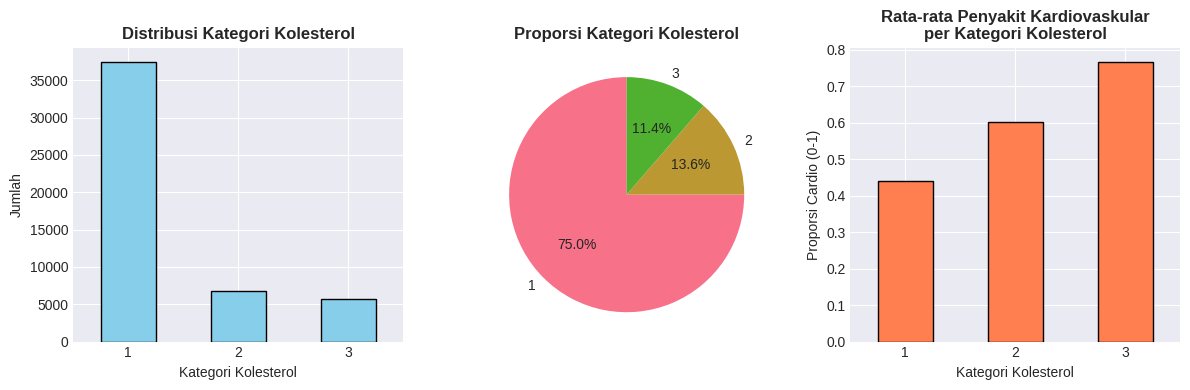

In [ ]:
# Visualisasi distribusi kolesterol
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['cholesterol'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Kategori Kolesterol', fontsize=12, fontweight='bold')
plt.xlabel('Kategori Kolesterol')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df['cholesterol'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kategori Kolesterol', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.subplot(1, 3, 3)
cardio_by_chol = df.groupby('cholesterol')['cardio'].mean()
cardio_by_chol.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Rata-rata Penyakit Kardiovaskular\nper Kategori Kolesterol', fontsize=12, fontweight='bold')
plt.xlabel('Kategori Kolesterol')
plt.ylabel('Proporsi Cardio (0-1)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('cholesterol_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# PERSIAPAN DATA UNTUK CLUSTERING

In [ ]:
# Kita akan gunakan: age, cholesterol, gluc, ap_hi, ap_lo, weight, height
features_for_clustering = ['age', 'cholesterol', 'gluc', 'ap_hi', 'ap_lo', 'weight', 'height']

In [ ]:
# Konversi age dari hari ke tahun
df['age_years'] = df['age'] / 365.25

In [ ]:
# Buat dataset clustering
df_cluster = df[['age_years', 'cholesterol', 'gluc', 'ap_hi', 'ap_lo', 'weight', 'height']].copy()

print(f"Jumlah data: {len(df_cluster):,}")

Jumlah data: 49,961


In [ ]:
# Cek dan bersihkan data outlier ekstrem
print("\nCek outlier ekstrem:")
for col in df_cluster.columns:
    q1 = df_cluster[col].quantile(0.01)
    q99 = df_cluster[col].quantile(0.99)
    print(f"  {col}: min={df_cluster[col].min()}, max={df_cluster[col].max()}")


Cek outlier ekstrem:
  age_years: min=29.56331279945243, max=64.85968514715948
  cholesterol: min=1, max=3
  gluc: min=1, max=3
  ap_hi: min=-150, max=16020
  ap_lo: min=0, max=11000
  weight: min=11.0, max=200.0
  height: min=55, max=250


In [ ]:
# Filter data yang masuk akal untuk tekanan darah
df_cluster = df_cluster[
    (df_cluster['ap_hi'] >= 70) & (df_cluster['ap_hi'] <= 250) &
    (df_cluster['ap_lo'] >= 40) & (df_cluster['ap_lo'] <= 150) &
    (df_cluster['weight'] > 30) & (df_cluster['weight'] < 200) &
    (df_cluster['height'] > 130) & (df_cluster['height'] < 220)
]

print(f"Setelah cleaning outlier: {len(df_cluster):,} data")

Setelah cleaning outlier: 48,997 data


# NORMALISASI DATA

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(df_scaled, columns=df_cluster.columns)

print("✓ Data telah dinormalisasi menggunakan StandardScaler")
print("\nStatistik setelah normalisasi:")
print(df_scaled.describe().round(2))

✓ Data telah dinormalisasi menggunakan StandardScaler

Statistik setelah normalisasi:
       age_years  cholesterol      gluc     ap_hi     ap_lo    weight  \
count   49961.00     49961.00  49961.00  49961.00  49961.00  49961.00   
mean       -0.00        -0.00     -0.00     -0.00      0.00      0.00   
std         1.00         1.00      1.00      1.00      1.00      1.00   
min        -3.51        -0.54     -0.39     -1.80     -0.48     -4.41   
25%        -0.73        -0.54     -0.39     -0.06     -0.08     -0.64   
50%         0.10        -0.54     -0.39     -0.06     -0.08     -0.16   
75%         0.75        -0.54     -0.39      0.07     -0.03      0.54   
max         1.71         2.42      3.10    102.85     54.45      8.78   

         height  
count  49961.00  
mean      -0.00  
std        1.00  
min      -13.35  
25%       -0.66  
50%        0.08  
75%        0.69  
max       10.46  


# MENENTUKAN JUMLAH CLUSTER OPTIMAL

In [ ]:
# Metode Elbow
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nMenghitung metrik untuk K = 2 sampai 10...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    print(f"  K={k}: Inertia={kmeans.inertia_:.0f}, Silhouette={silhouette_scores[-1]:.3f}")



Menghitung metrik untuk K = 2 sampai 10...
  K=2: Inertia=290955, Silhouette=0.378
  K=3: Inertia=243103, Silhouette=0.381
  K=4: Inertia=212001, Silhouette=0.197
  K=5: Inertia=188874, Silhouette=0.205
  K=6: Inertia=154156, Silhouette=0.208
  K=7: Inertia=135983, Silhouette=0.226
  K=8: Inertia=123756, Silhouette=0.235
  K=9: Inertia=113772, Silhouette=0.221
  K=10: Inertia=106008, Silhouette=0.227


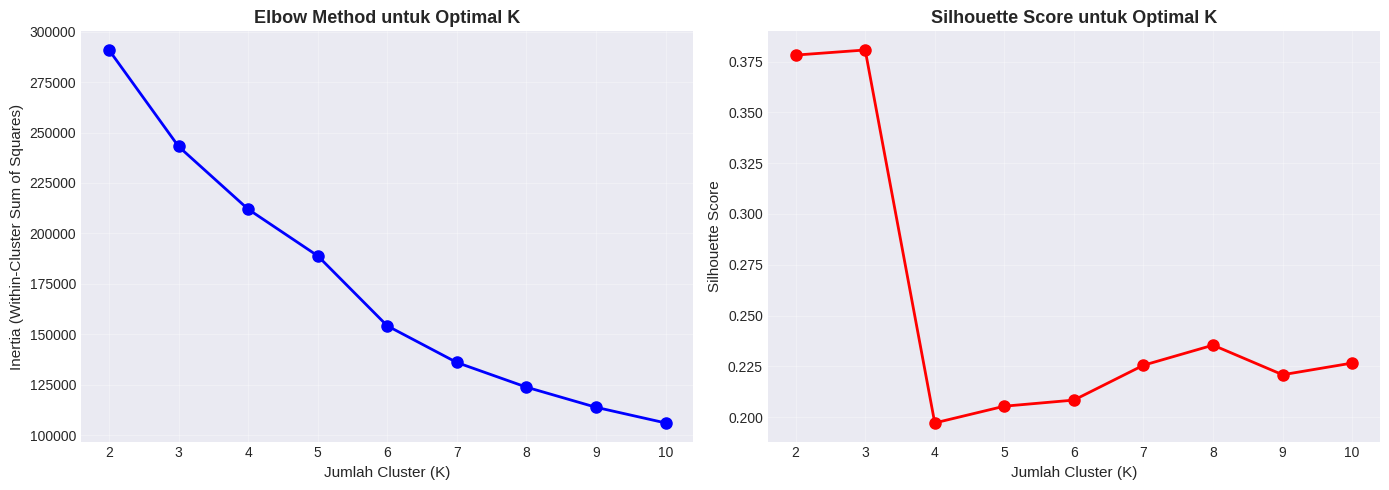

In [ ]:
# Visualisasi Elbow Method dan Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (K)', fontsize=11)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=11)
plt.title('Elbow Method untuk Optimal K', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Cluster (K)', fontsize=11)
plt.ylabel('Silhouette Score', fontsize=11)
plt.title('Silhouette Score untuk Optimal K', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

plt.tight_layout()
plt.savefig('optimal_k_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Rekomendasi K optimal
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f" REKOMENDASI: K optimal = {optimal_k} (berdasarkan Silhouette Score tertinggi)")


📊 REKOMENDASI: K optimal = 3 (berdasarkan Silhouette Score tertinggi)


# CLUSTERING DENGAN K-MEANS

In [ ]:
# Gunakan K optimal
k_final = 3  # Anda bisa ubah sesuai rekomendasi
print(f"\nMenggunakan K = {k_final}")

kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10, max_iter=300)
clusters = kmeans_final.fit_predict(df_scaled)


Menggunakan K = 3


In [ ]:
# Tambahkan hasil cluster ke dataframe asli
df_cluster['Cluster'] = clusters

print(f"\n✓ Clustering selesai!")
print(f"\nDistribusi Cluster:")
print(df_cluster['Cluster'].value_counts().sort_index())


✓ Clustering selesai!

Distribusi Cluster:
Cluster
0    41058
1     8897
2        6
Name: count, dtype: int64


# EVALUASI MODEL CLUSTERING

In [ ]:
# Hitung metrik evaluasi
silhouette = silhouette_score(df_scaled, clusters)
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)

print("\nMETRIK EVALUASI CLUSTERING:")
print(f"  • Silhouette Score      : {silhouette:.4f}")
print(f"    (Range: -1 to 1, semakin tinggi semakin baik)")
print(f"  • Davies-Bouldin Index  : {davies_bouldin:.4f}")
print(f"    (Semakin rendah semakin baik)")
print(f"  • Calinski-Harabasz     : {calinski_harabasz:.2f}")
print(f"    (Semakin tinggi semakin baik)")


METRIK EVALUASI CLUSTERING:
  • Silhouette Score      : 0.3807
    (Range: -1 to 1, semakin tinggi semakin baik)
  • Davies-Bouldin Index  : 1.0461
    (Semakin rendah semakin baik)
  • Calinski-Harabasz     : 10955.70
    (Semakin tinggi semakin baik)


In [ ]:
# Interpretasi Silhouette Score
if silhouette > 0.5:
    interpretasi = "BAIK - Cluster terbentuk dengan jelas"
elif silhouette > 0.25:
    interpretasi = "CUKUP - Cluster terbentuk namun ada overlap"
else:
    interpretasi = "KURANG - Cluster tidak jelas terbentuk"

print(f"\n✓ Interpretasi: {interpretasi}")


✓ Interpretasi: CUKUP - Cluster terbentuk namun ada overlap


# KARAKTERISTIK SETIAP CLUSTER

In [ ]:
# Analisis profil setiap cluster
cluster_summary = df_cluster.groupby('Cluster').agg({
    'age_years': 'mean',
    'cholesterol': 'mean',
    'gluc': 'mean',
    'ap_hi': 'mean',
    'ap_lo': 'mean',
    'weight': 'mean',
    'height': 'mean'
}).round(2)

print("\nRata-rata Karakteristik per Cluster:")
print(cluster_summary)


Rata-rata Karakteristik per Cluster:
         age_years  cholesterol  gluc     ap_hi   ap_lo  weight  height
Cluster                                                                
0            52.82         1.12  1.04    125.79   91.50   73.18  164.51
1            55.48         2.51  2.10    133.10  122.22   79.10  163.69
2            51.25         1.50  1.33  13933.33   85.00   73.17  170.33


In [ ]:
# Distribusi kolesterol per cluster
print("\n\nDistribusi Kategori Kolesterol per Cluster:")
chol_dist = pd.crosstab(df_cluster['Cluster'], df_cluster['cholesterol'], normalize='index') * 100
print(chol_dist.round(1))



Distribusi Kategori Kolesterol per Cluster:
cholesterol     1     2     3
Cluster                      
0            88.4  11.6   0.0
1            13.1  23.1  63.8
2            66.7  16.7  16.7


# VISUALISASI HASIL CLUSTERING

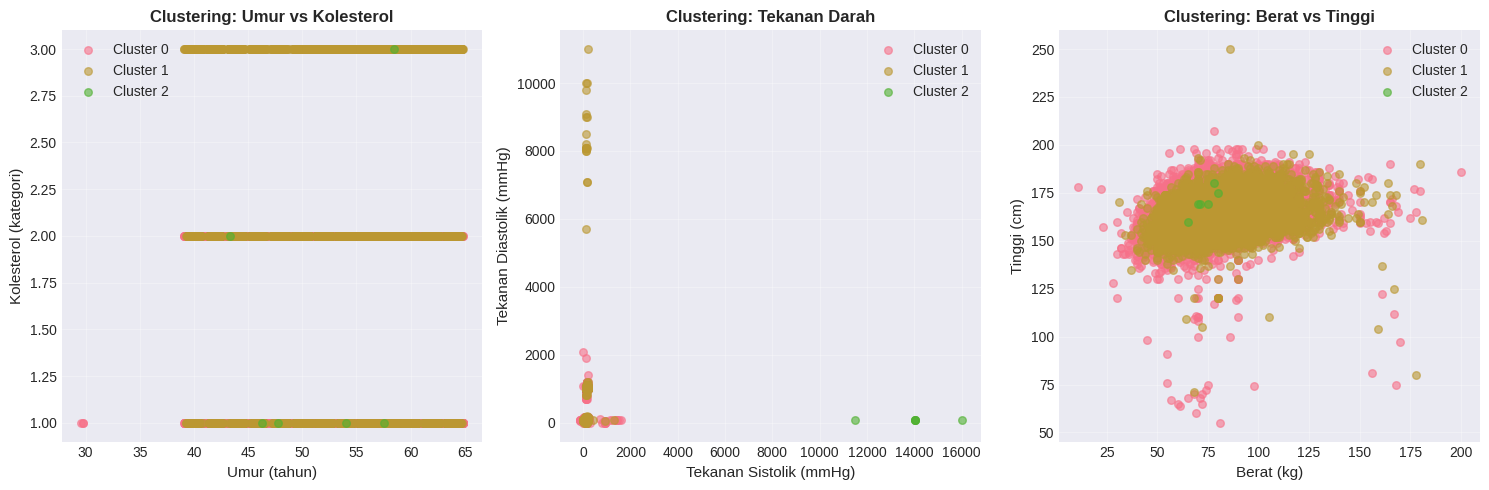

✓ Visualisasi clustering disimpan sebagai 'clustering_results.png'


In [ ]:
# Visualisasi 1: Scatter plot (Age vs Cholesterol)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for cluster in range(k_final):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(cluster_data['age_years'], cluster_data['cholesterol'],
                label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('Umur (tahun)', fontsize=11)
plt.ylabel('Kolesterol (kategori)', fontsize=11)
plt.title('Clustering: Umur vs Kolesterol', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
for cluster in range(k_final):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(cluster_data['ap_hi'], cluster_data['ap_lo'],
                label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('Tekanan Sistolik (mmHg)', fontsize=11)
plt.ylabel('Tekanan Diastolik (mmHg)', fontsize=11)
plt.title('Clustering: Tekanan Darah', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
for cluster in range(k_final):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster]
    plt.scatter(cluster_data['weight'], cluster_data['height'],
                label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('Berat (kg)', fontsize=11)
plt.ylabel('Tinggi (cm)', fontsize=11)
plt.title('Clustering: Berat vs Tinggi', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('clustering_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualisasi clustering disimpan sebagai 'clustering_results.png'")


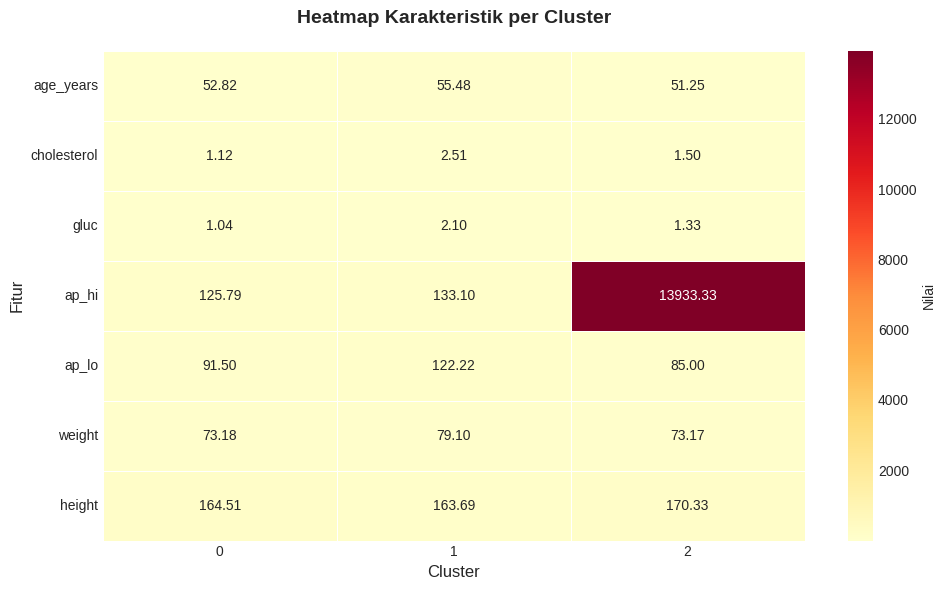

✓ Heatmap karakteristik disimpan sebagai 'cluster_heatmap.png'


In [ ]:
# Visualisasi 2: Heatmap karakteristik cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Nilai'}, linewidths=0.5)
plt.title('Heatmap Karakteristik per Cluster', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap karakteristik disimpan sebagai 'cluster_heatmap.png'")


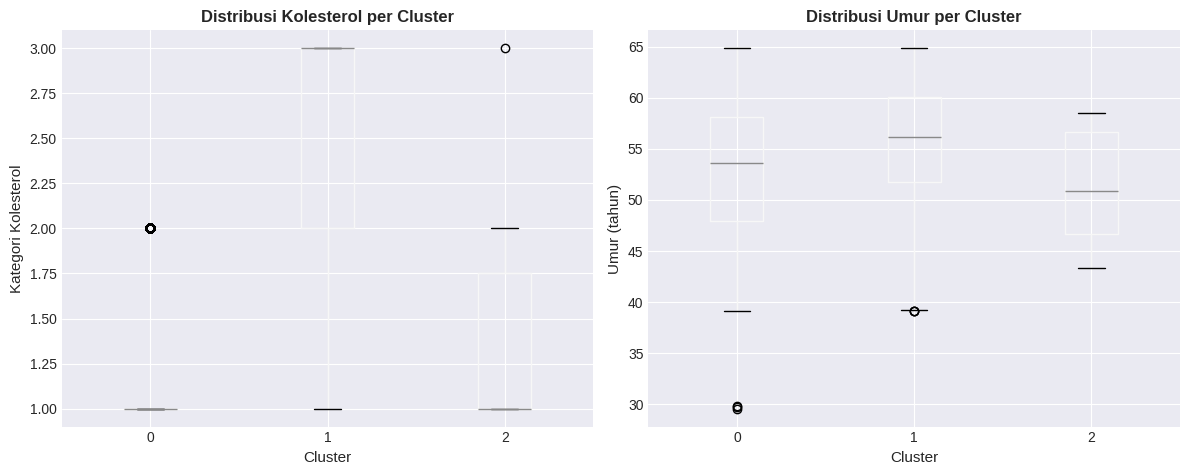

✓ Distribusi cluster disimpan sebagai 'cluster_distributions.png'


In [ ]:
# Visualisasi 3: Box plot distribusi kolesterol per cluster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_cluster.boxplot(column='cholesterol', by='Cluster', ax=plt.gca())
plt.title('Distribusi Kolesterol per Cluster', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Kategori Kolesterol', fontsize=11)

plt.subplot(1, 2, 2)
df_cluster.boxplot(column='age_years', by='Cluster', ax=plt.gca())
plt.title('Distribusi Umur per Cluster', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Umur (tahun)', fontsize=11)

plt.tight_layout()
plt.savefig('cluster_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Distribusi cluster disimpan sebagai 'cluster_distributions.png'")

# KESIMPULAN DAN INTERPRETASI

In [ ]:
print(f"\n1. MODEL:")
print(f"   • Algoritma: K-Means Clustering")
print(f"   • Jumlah Cluster: {k_final}")
print(f"   • Jumlah Data: {len(df_cluster):,}")

print(f"\n2. PERFORMA MODEL:")
print(f"   • Silhouette Score: {silhouette:.4f} ({interpretasi})")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"   • Calinski-Harabasz Score: {calinski_harabasz:.2f}")

print(f"\n3. INTERPRETASI CLUSTER:")
for i in range(k_final):
    cluster_size = len(df_cluster[df_cluster['Cluster'] == i])
    pct = (cluster_size / len(df_cluster)) * 100
    avg_age = cluster_summary.loc[i, 'age_years']
    avg_chol = cluster_summary.loc[i, 'cholesterol']
    avg_ap_hi = cluster_summary.loc[i, 'ap_hi']

    print(f"\n   Cluster {i} ({cluster_size:,} data, {pct:.1f}%):")
    print(f"   - Rata-rata umur: {avg_age:.1f} tahun")
    print(f"   - Rata-rata kolesterol: {avg_chol:.2f}")
    print(f"   - Rata-rata tekanan sistolik: {avg_ap_hi:.1f} mmHg")

print(f"\n4. REKOMENDASI:")
print(f"   • Cluster dengan kolesterol tinggi perlu perhatian khusus")
print(f"   • Monitoring rutin untuk cluster dengan tekanan darah tinggi")
print(f"   • Program pencegahan disesuaikan dengan profil setiap cluster")

print("\n" + "="*60)
print("ANALISIS SELESAI!")
print("="*60)



1. MODEL:
   • Algoritma: K-Means Clustering
   • Jumlah Cluster: 3
   • Jumlah Data: 49,961

2. PERFORMA MODEL:
   • Silhouette Score: 0.3807 (CUKUP - Cluster terbentuk namun ada overlap)
   • Davies-Bouldin Index: 1.0461
   • Calinski-Harabasz Score: 10955.70

3. INTERPRETASI CLUSTER:

   Cluster 0 (41,058 data, 82.2%):
   - Rata-rata umur: 52.8 tahun
   - Rata-rata kolesterol: 1.12
   - Rata-rata tekanan sistolik: 125.8 mmHg

   Cluster 1 (8,897 data, 17.8%):
   - Rata-rata umur: 55.5 tahun
   - Rata-rata kolesterol: 2.51
   - Rata-rata tekanan sistolik: 133.1 mmHg

   Cluster 2 (6 data, 0.0%):
   - Rata-rata umur: 51.2 tahun
   - Rata-rata kolesterol: 1.50
   - Rata-rata tekanan sistolik: 13933.3 mmHg

4. REKOMENDASI:
   • Cluster dengan kolesterol tinggi perlu perhatian khusus
   • Monitoring rutin untuk cluster dengan tekanan darah tinggi
   • Program pencegahan disesuaikan dengan profil setiap cluster

ANALISIS SELESAI!
